In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df=pd.read_csv("Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


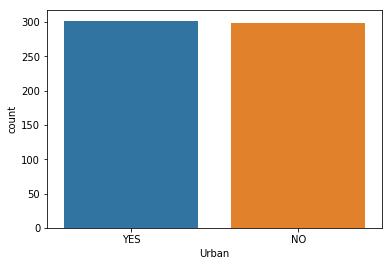

In [9]:
sns.countplot(x = df['Urban'],data=df)

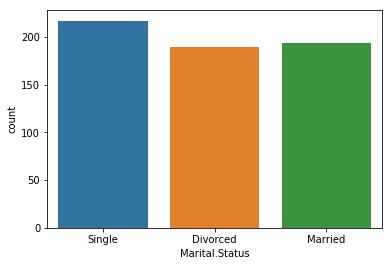

In [11]:
sns.countplot(x = df['Marital.Status'],data=df)

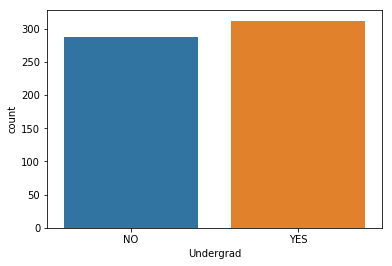

In [10]:
sns.countplot(x = df['Undergrad'],data=df)

C:\Users\ayukk22\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


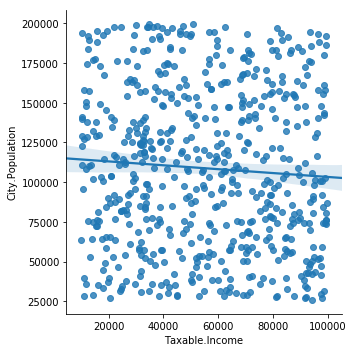

In [22]:
sns.lmplot(x='Taxable.Income',y='City.Population',data=df)

In [23]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
Undergrad          600 non-null object
Marital.Status     600 non-null object
Taxable.Income     600 non-null int64
City.Population    600 non-null int64
Work.Experience    600 non-null int64
Urban              600 non-null object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [24]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [25]:
Column_names = ['Undergrad', 'Marital.Status','City.Population','Work.Experience', 'Urban']

In [27]:
df['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

Text(0,0.5,'Population')

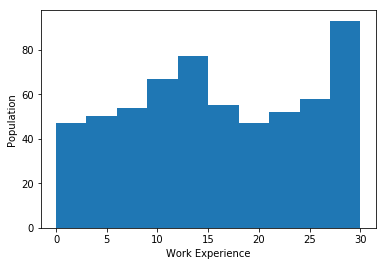

In [28]:
plt.hist(df['Work.Experience'])
plt.xlabel('Work Experience')
plt.ylabel('Population')

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
Le = LabelEncoder()

In [33]:
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = Le.fit_transform(df[column_name])
    else:
            pass

In [36]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,New
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good


In [37]:
df.loc[df['Taxable.Income'] > 30000, 'New'] = 'Good'
df.loc[df['Taxable.Income'] > 30000, 'New'] = 'Good'

In [41]:
# Split the data into X and Y

X = df.iloc[:,0:5]
X

Y = df.iloc[:,5]
Y.head()

0    1
1    1
2    1
3    1
4    0
Name: Urban, dtype: int64

In [42]:
# splitting the data into train and test sets

from sklearn.model_selection import train_test_split

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [86]:
# fitting and predicting the model.

from sklearn.tree import DecisionTreeClassifier

In [87]:
Classifier = DecisionTreeClassifier(criterion='gini')

In [88]:
Classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [89]:
Xpred = Classifier.predict(X_test)

In [90]:
# Find the accuracy of the data

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [91]:
conf_mat = confusion_matrix(Xpred,y_test)
conf_mat

array([[40, 35],
       [44, 61]], dtype=int64)

In [92]:
acc = accuracy_score(Xpred,y_test)*100
acc

56.111111111111114

In [94]:
# Tuning the parameters
Classifier = DecisionTreeClassifier(criterion='gini',min_samples_split=50)
Classifier.fit(X_train,y_train)
Xpred = Classifier.predict(X_test)

In [95]:
conf_mat = confusion_matrix(Xpred,y_test)
conf_mat

array([[55, 49],
       [29, 47]], dtype=int64)

In [96]:
acc = accuracy_score(Xpred,y_test)*100
acc

56.666666666666664

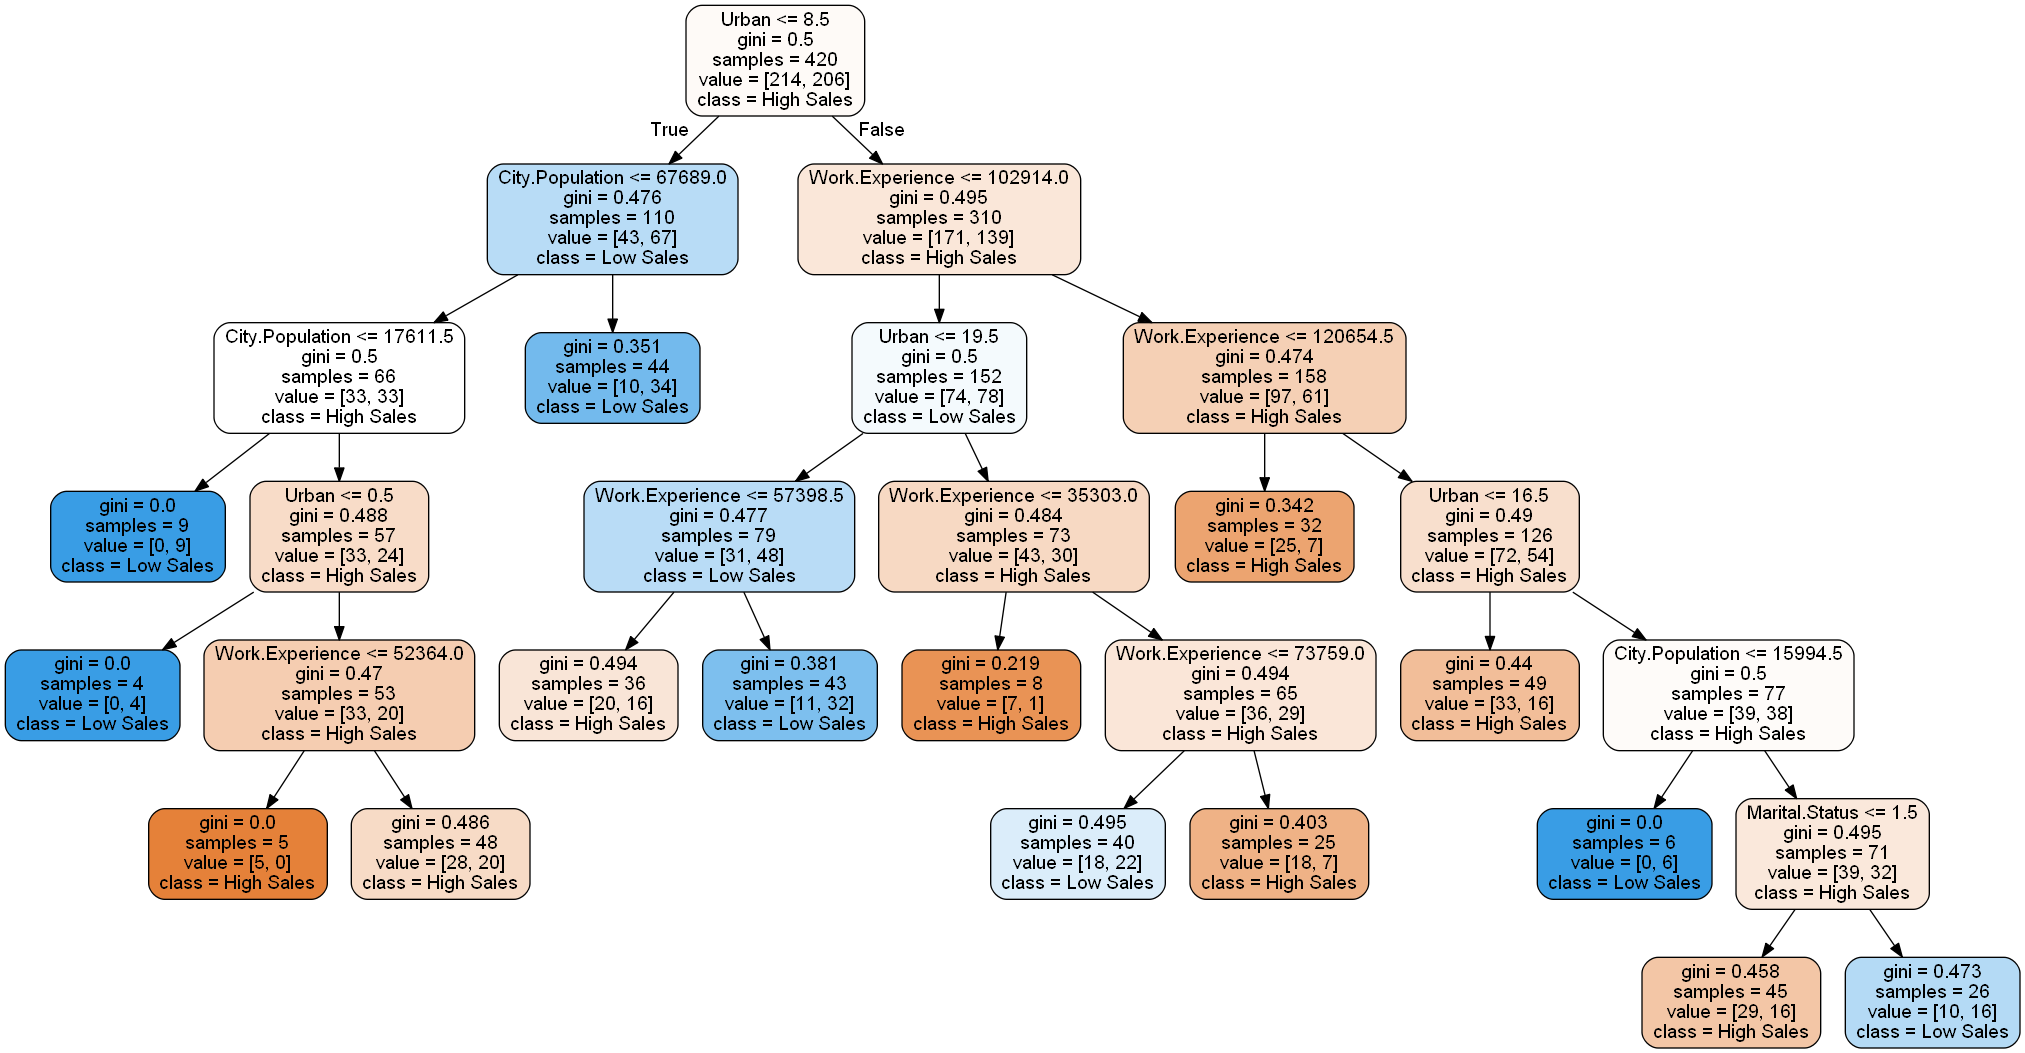

In [97]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(Classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=False,feature_names = Column_names ,class_names= ['High Sales','Low Sales'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [100]:
print(classification_report(Xpred,y_test))

             precision    recall  f1-score   support

          0       0.65      0.53      0.59       104
          1       0.49      0.62      0.55        76

avg / total       0.59      0.57      0.57       180

